# FIT5196 Assessment 3

Date: 12/06/2019

Version: 1.0

Environment: Python 3.6.5 and Anaconda 4.4.10 (64-bit)

Libraries used:
* pandas
* shapefile
* numpy
* geopandas
* matplotlib
* shapely
* ast
* math
* sklearn
* r2_score


## 0. Assumption
Following input files/directories are in the current directory:
* `29620163.csv`
* `gtfs`
* `vic_suburb_boundary`
* `councils.txt`
* `crimebylocationdatatable-yearending31march2016.xlsx`



## 1. Introduction
The dataset is about Properties across Melbourne Victoria, Australia. 

This task at hand is to calculate few fields as per the requirements and perform some transformation on the data as well. 

More details for each task will be given in the following sections.

## 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import shapefile
import geopandas
from shapely.geometry import Point, Polygon
import ast
import math
from math import sin, cos, sqrt, atan2, radians
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 3. Task 1 - Data Integration

Read the data from the dirty file and examine its size and first few rows.

In [2]:
df_data = pd.read_csv('29620163.csv')
print(df_data.shape)
df_data.head()

(720, 12)


,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID333126618,1 River St,2,h,1120000.0,14/05/2016,1.0,3.0,574.0,49.0,-37.8414,144.89220
1,ID635375418,14 Baird St,4,h,655000.0,27/11/2016,1.0,3.0,664.0,49.0,-37.7063,144.97120
2,ID521636627,2/71 Roslyn St,4,t,1630000.0,25/02/2017,2.0,2.0,432.0,19.0,-37.9228,145.00220
3,ID775033999,85 Turner St,2,h,1480000.0,3/12/2016,1.0,1.0,202.0,NaN,-37.7996,144.99840
4,ID712990006,1/118 Rathcown Rd,2,u,502000.0,15/07/2017,1.0,2.0,230.0,4.0,-37.7090,145.02014


First have a look at the data types of the columns.

In [3]:
df_data.dtypes

ID             object
Address        object
Rooms           int64
Type           object
Price         float64
Date           object
Bathroom      float64
Car           float64
Landsize      float64
Age           float64
Lattitude     float64
Longtitude    float64
dtype: object

Lets see if there are any missing values

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
ID            720 non-null object
Address       720 non-null object
Rooms         720 non-null int64
Type          720 non-null object
Price         720 non-null float64
Date          720 non-null object
Bathroom      720 non-null float64
Car           720 non-null float64
Landsize      720 non-null float64
Age           719 non-null float64
Lattitude     720 non-null float64
Longtitude    720 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 67.6+ KB


In [5]:
df_data.describe()

,Rooms,Price,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
count,720.000000,7.200000e+02,720.000000,720.000000,720.000000,719.000000,720.000000,720.000000
mean,2.966667,1.069698e+06,1.556944,1.638889,543.790278,56.221140,-37.803494,144.992675
std,0.953144,6.221692e+05,0.697368,1.040295,1591.120244,46.269253,0.080776,0.107546
min,1.000000,2.575000e+05,1.000000,0.000000,0.000000,3.000000,-38.163200,144.485710
25%,2.000000,6.467500e+05,1.000000,1.000000,189.000000,20.500000,-37.851225,144.922605
50%,3.000000,9.000000e+05,1.000000,2.000000,458.500000,49.000000,-37.796015,144.999800
75%,4.000000,1.306250e+06,2.000000,2.000000,647.250000,79.000000,-37.750240,145.059825
max,6.000000,5.525000e+06,5.000000,6.000000,38490.000000,823.000000,-37.500870,145.482730


We see that there is a missing value in the Age field. It shouldn't have been there but since it is there, I'll replace it with the mean of the column since it is just 1 data point. 

In [6]:
df_data['Age'] = df_data['Age'].fillna(df_data['Age'].mean())

In [7]:
df_data.describe()

,Rooms,Price,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
count,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2.966667,1.069698e+06,1.556944,1.638889,543.790278,56.221140,-37.803494,144.992675
std,0.953144,6.221692e+05,0.697368,1.040295,1591.120244,46.237066,0.080776,0.107546
min,1.000000,2.575000e+05,1.000000,0.000000,0.000000,3.000000,-38.163200,144.485710
25%,2.000000,6.467500e+05,1.000000,1.000000,189.000000,20.750000,-37.851225,144.922605
50%,3.000000,9.000000e+05,1.000000,2.000000,458.500000,49.000000,-37.796015,144.999800
75%,4.000000,1.306250e+06,2.000000,2.000000,647.250000,79.000000,-37.750240,145.059825
max,6.000000,5.525000e+06,5.000000,6.000000,38490.000000,823.000000,-37.500870,145.482730


We see that, the mean of the Age column hasn't changed, so we are good.

### 3.1 Suburb

First we use the geopandas file to read the shape files

In [8]:
import geopandas

gdf = geopandas.read_file("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp")
print(gdf.shape)
gdf.head()

(2973, 13)


,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552399 -35.07228701, 141.74552..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.668767 -37.39571245, 148.6687620..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92287999 -37.97885997, 142.90449..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82335712 -37.66000897, 147.82312..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.279783 -35.99858911, 141.2798853..."


Now we will add Suburb to the dataset by using the property's lat and lon using the below created function

In [9]:
# Introduce the column 'Suburb' and set its default value
df_data['Suburb'] = 'not available'

In [10]:
suburb_dict = dict(zip(list(gdf['VIC_LOCA_2']),list(gdf['geometry'])))

In [11]:
# This function returns the Suburb from the shape file data frame
def get_suburb(lon, lat):
    point = Point(lon, lat)
    for k,v in suburb_dict.items():
        p = Polygon(v)
        if p.contains(point):
            return k
    return "not available"

In [12]:
df_data['Suburb'] = df_data.apply(lambda row: get_suburb(row["Longtitude"], row["Lattitude"]), axis=1)

In [13]:
df_data.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID333126618,1 River St,2,h,1120000.0,14/05/2016,1.0,3.0,574.0,49.00000,-37.8414,144.89220,NEWPORT
1,ID635375418,14 Baird St,4,h,655000.0,27/11/2016,1.0,3.0,664.0,49.00000,-37.7063,144.97120,FAWKNER
2,ID521636627,2/71 Roslyn St,4,t,1630000.0,25/02/2017,2.0,2.0,432.0,19.00000,-37.9228,145.00220,BRIGHTON
3,ID775033999,85 Turner St,2,h,1480000.0,3/12/2016,1.0,1.0,202.0,56.22114,-37.7996,144.99840,ABBOTSFORD
4,ID712990006,1/118 Rathcown Rd,2,u,502000.0,15/07/2017,1.0,2.0,230.0,4.00000,-37.7090,145.02014,RESERVOIR


In [14]:
df_data[df_data['Suburb'] == 'not available']

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
208,ID556369533,9 Sullivan St,2,h,906000.0,22/07/2017,1.0,1.0,617.0,59.0,-37.7528,145.04444,not available


We see that there is one data point for which we could not find the Suburb and hence it is not available. 

### 3.2 Over Priced

In [15]:
# First calculate the year for calculatig the price
df_data['Year'] = df_data.apply(lambda row: str(row['Date']).split('/')[-1], axis=1)

In [16]:
df_data['Year'].value_counts()

2017    389
2016    331
Name: Year, dtype: int64

Now, create an extra column for over_priced and set the default value

In [17]:
df_data['over_priced?'] = -1

In [18]:
# Following code iterates over the data frame and finds the relevant properties
# and then caluclates the median of it. Then the median is compared with the 
# sale price of the property.
for i, row in df_data.iterrows():
    Rooms = row['Rooms']
    Bathroom = row['Bathroom']
    Car = row['Car']
    Type = row['Type']
    Suburb = row['Suburb']
    Year = row['Year']
    df_temp = df_data[(df_data['Rooms'] == Rooms) & (df_data['Bathroom'] == Bathroom)\
            & (df_data['Car'] == Car) & (df_data['Type'] == Type)& (df_data['Suburb'] == Suburb)\
                      & (df_data['Year'] == Year)]
    
    if row['Price'] > df_temp['Price'].median():
        df_data.loc[i, 'over_priced?'] = 1
    else:
        df_data.loc[i, 'over_priced?'] = 0

In [19]:
df_data.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,over_priced?
0,ID333126618,1 River St,2,h,1120000.0,14/05/2016,1.0,3.0,574.0,49.00000,-37.8414,144.89220,NEWPORT,2016,0
1,ID635375418,14 Baird St,4,h,655000.0,27/11/2016,1.0,3.0,664.0,49.00000,-37.7063,144.97120,FAWKNER,2016,0
2,ID521636627,2/71 Roslyn St,4,t,1630000.0,25/02/2017,2.0,2.0,432.0,19.00000,-37.9228,145.00220,BRIGHTON,2017,0
3,ID775033999,85 Turner St,2,h,1480000.0,3/12/2016,1.0,1.0,202.0,56.22114,-37.7996,144.99840,ABBOTSFORD,2016,0
4,ID712990006,1/118 Rathcown Rd,2,u,502000.0,15/07/2017,1.0,2.0,230.0,4.00000,-37.7090,145.02014,RESERVOIR,2017,0


In [20]:
df_data['over_priced?'].value_counts()

0    666
1     54
Name: over_priced?, dtype: int64

So we found 54 properties that are overpriced.

### 3.3 Crime averages

For Crime rates, first we need to map the Suburb of the property to the Local Goverment area (lga). The below code reads the council.txt and then map it to the properties data set

In [21]:
lga_dict = {}
with open('councils.txt', 'r') as outfile:
    for line in outfile:
        t = line.split(':')
        lst = ast.literal_eval(t[1].strip())
        lst = [n.strip().lower() for n in lst]
        lga_dict[t[0].strip()] = lst 

In [22]:
# Set an empty column for lga
df_data['lga'] = ''

In [23]:
# Iterate over the data frame and set the lga
for i, row in df_data.iterrows():
    Suburb = str(row['Suburb']).strip().lower()
    
    for k,v in lga_dict.items():
        if Suburb in v:
            df_data.loc[i, 'lga'] = k

In [24]:
df_data[df_data['lga'] == '']

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,over_priced?,lga
208,ID556369533,9 Sullivan St,2,h,906000.0,22/07/2017,1.0,1.0,617.0,59.0,-37.7528,145.04444,not available,2017,0,


As we see, there is one row that does not have lga, and it is the same row from above that had a missing Suburb.

In [25]:
xls = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx')
df_crime = pd.read_excel(xls, 'Table 1',skiprows=19)
print(df_crime.shape)
df_crime.head()

(9085, 10)


,Unnamed: 0,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


Get the offence type from the first character of offence. 

In [26]:
df_crime['Offense_type'] = df_crime['CSA Offence Division'].str[0]

In [27]:
df_crime['Offense_type'].value_counts()

A    2696
B    2012
D    1306
C    1212
F    1076
E     783
Name: Offense_type, dtype: int64

In [28]:
# Set initial values of crime averages
df_data['crime_A_average'] = -1
df_data['crime_B_average'] = -1
df_data['crime_C_average'] = -1

In [29]:
df_crime_grouped = df_crime.groupby(['Apr - Mar reference period', 'Local Government Area', 'Offense_type'], as_index=False).sum()

In [30]:
# Iterate over the data frame and set the Offence count average
for i, row in df_data.iterrows():
    min_year = int(row['Year']) - 3
    max_year = int(row['Year']) - 1
    temp_df = df_crime_grouped[(df_crime_grouped['Apr - Mar reference period'] >= min_year) &\
                       (df_crime_grouped['Apr - Mar reference period'] <= max_year) &\
                       (df_crime_grouped['Local Government Area'] == row['lga'])] 
    df_data.loc[i, 'crime_A_average'] = temp_df[temp_df['Offense_type'] == "A"]['Offence Count'].mean()
    df_data.loc[i, 'crime_B_average'] = temp_df[temp_df['Offense_type'] == "B"]['Offence Count'].mean()
    df_data.loc[i, 'crime_C_average'] = temp_df[temp_df['Offense_type'] == "C"]['Offence Count'].mean()

In [31]:
df_data[df_data['crime_A_average'].isna()]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,over_priced?,lga,crime_A_average,crime_B_average,crime_C_average
208,ID556369533,9 Sullivan St,2,h,906000.0,22/07/2017,1.0,1.0,617.0,59.0,-37.7528,145.04444,not available,2017,0,,NaN,NaN,NaN


The same data point appears here again and hence, we just set the value to -1 for null values.

In [32]:
df_data['crime_A_average'] = np.where(df_data['crime_A_average'].isna(), -1, df_data['crime_A_average'])
df_data['crime_B_average'] = np.where(df_data['crime_B_average'].isna(), -1, df_data['crime_B_average'])
df_data['crime_C_average'] = np.where(df_data['crime_C_average'].isna(), -1, df_data['crime_C_average'])

In [33]:
df_data.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,over_priced?,lga,crime_A_average,crime_B_average,crime_C_average
0,ID333126618,1 River St,2,h,1120000.0,14/05/2016,1.0,3.0,574.0,49.00000,-37.8414,144.89220,NEWPORT,2016,0,MANSFIELD,71.000000,261.000000,20.000000
1,ID635375418,14 Baird St,4,h,655000.0,27/11/2016,1.0,3.0,664.0,49.00000,-37.7063,144.97120,FAWKNER,2016,0,MONASH,1144.333333,6845.666667,375.666667
2,ID521636627,2/71 Roslyn St,4,t,1630000.0,25/02/2017,2.0,2.0,432.0,19.00000,-37.9228,145.00220,BRIGHTON,2017,0,HUME,2897.333333,11243.000000,942.000000
3,ID775033999,85 Turner St,2,h,1480000.0,3/12/2016,1.0,1.0,202.0,56.22114,-37.7996,144.99840,ABBOTSFORD,2016,0,BANYULE,1202.000000,5034.333333,333.000000
4,ID712990006,1/118 Rathcown Rd,2,u,502000.0,15/07/2017,1.0,2.0,230.0,4.00000,-37.7090,145.02014,RESERVOIR,2017,0,EAST GIPPSLAND,885.000000,1901.000000,227.666667


### 3.4 train_station_id, distance_to_train_station, travel_min_to_CBD

All three are taken care together.

We would create some utility functions as we go along for the ease of usage.

To summarise, the logic is, that we iterate through each row in the properties dataset and for each property, get the list of distances from all stations in descending order in a data frame. Using that, starting from the first station, we keep searching for a station till we find one that has a direct trip to Southern Cross (SC) station. Once we find that station, we just calculate the distance to that station, staioin id. Now, for that Station id, we look for all the trains departing between, 7 and 9:30AM and take the average of all the travel times. 

It must be noted that, the Regional and Metro train are both considerd because these two data are merged in the beginning itself. 

In [34]:
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# Function to calculate the distance given any set of origin and destination lat and lon.
def get_distance(o_lat, o_lon, d_lat, d_lon):
    
    radius = 6378000.0 # km

    lat1 = radians(o_lat)
    lon1 = radians(o_lon)
    lat2 = radians(d_lat)
    lon2 = radians(d_lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = radius * c

    return distance

From the gtfs data, we fetch the data for folder, 1 and 2 only because that corresponds to Metro and Regional

In [35]:
## Loading the required data frames
calendar = pd.read_csv("gtfs/1/google_transit/calendar.txt")
calendar_dates = pd.read_csv("gtfs/1/google_transit/calendar_dates.txt")
routes = pd.read_csv("gtfs/1/google_transit/routes.txt")
stop_times = pd.read_csv("gtfs/1/google_transit/stop_times.txt")
stop_df = pd.read_csv("gtfs/1/google_transit/stops.txt")
trips = pd.read_csv("gtfs/1/google_transit/trips.txt")

In [36]:
merge1 = trips.merge(routes, on="route_id")
merge2 = merge1.merge(calendar, on="service_id")
merge3 = merge2.merge(stop_times, on="trip_id")
merged_df_1 = merge3.merge(stop_df, on="stop_id")
print(merged_df_1.shape)
merged_df_1.head()

(72489, 32)


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,...,06:08:00,20291,1,NaN,0,0,0.000000,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,...,12:45:00,20291,1,NaN,0,0,0.000000,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,...,18:18:00,20291,1,NaN,0,0,0.000000,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,...,11:11:00,20291,23,NaN,0,0,276406.889886,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,...,17:07:00,20291,23,NaN,0,0,276406.889886,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614


In [37]:
## Loading the required data frames
calendar = pd.read_csv("gtfs/2/google_transit/calendar.txt")
calendar_dates = pd.read_csv("gtfs/2/google_transit/calendar_dates.txt")
routes = pd.read_csv("gtfs/2/google_transit/routes.txt")
stop_times = pd.read_csv("gtfs/2/google_transit/stop_times.txt")
stop_df = pd.read_csv("gtfs/2/google_transit/stops.txt")
trips = pd.read_csv("gtfs/2/google_transit/trips.txt")

In [38]:
## Merging all the Data frame to create one single Data Frame
merge1 = trips.merge(routes, on="route_id")
merge2 = merge1.merge(calendar, on="service_id")
merge3 = merge2.merge(stop_times, on="trip_id")
merged_df = merge3.merge(stop_df, on="stop_id")
print(merged_df.shape)
merged_df.head()

(469488, 32)


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon
0,2-ALM-F-mjp-1,T0,8262.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,05:21:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
1,2-ALM-F-mjp-1,T0,8267.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,09:21:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
2,2-ALM-F-mjp-1,T0,8271.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,09:35:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
3,2-ALM-F-mjp-1,T0,8274.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,09:50:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
4,2-ALM-F-mjp-1,T0,8278.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,10:02:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697


In [39]:
# Combine both the data frames now
merged_df = merged_df.append(merged_df_1)
print(merged_df.shape)
merged_df.head()

(541977, 32)


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon
0,2-ALM-F-mjp-1,T0,8262.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,05:21:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
1,2-ALM-F-mjp-1,T0,8267.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,09:21:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
2,2-ALM-F-mjp-1,T0,8271.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,09:35:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
3,2-ALM-F-mjp-1,T0,8274.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,09:50:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697
4,2-ALM-F-mjp-1,T0,8278.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,10:02:00,19853,1,NaN,0,0,0.0,Camberwell Railway Station (Camberwell),-37.826567,145.058697


In [40]:
# Function used to create a flag for weekdays and time of train.
def create_flag(row):
    if row['monday'] == 1 and row['tuesday'] == 1 and row['wednesday'] == 1 and\
        row['thursday'] == 1 and row['friday'] == 1 and \
        row['departure_time'] >= "07:00:00" and row['departure_time'] <= "09:30:00":
        return 1
    else:
        return 0

In [41]:
# Use the above function to create the flag
merged_df['flag'] = merged_df.apply(lambda row: create_flag(row), axis=1)

In [42]:
# Get the station ID of Southern cross
sc_station_ids = list(merged_df[merged_df['stop_name'].str.contains('Southern Cross Railway Station')]['stop_id'].unique())
sc_station_ids

[22180, 20043]

In [43]:
# Fetch data which has SC as a stop
req_df = merged_df[(merged_df['stop_id'].isin(sc_station_ids))]

In [44]:
# Fetch data with flag 1
req_df = req_df[req_df['flag'] == 1]
print(req_df.shape)
req_df.head()

(603, 33)


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon,flag
89580,2-ALM-F-mjp-1,T0,8225.T0.2-ALM-F-mjp-1.3.H,2-ALM-F-mjp-1.3.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89581,2-ALM-F-mjp-1,T0,8227.T0.2-ALM-F-mjp-1.3.H,2-ALM-F-mjp-1.3.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89582,2-ALM-F-mjp-1,T0,8236.T0.2-ALM-F-mjp-1.6.H,2-ALM-F-mjp-1.6.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89583,2-ALM-F-mjp-1,T0,8237.T0.2-ALM-F-mjp-1.7.H,2-ALM-F-mjp-1.7.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89597,2-ALM-F-mjp-1,T0,8686.T0.2-ALM-F-mjp-1.10.R,2-ALM-F-mjp-1.10.R,City (Flinders Street),1,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,17,NaN,0,0,17591.768937,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1


In [45]:
# Remove data from stop_sequence=1 because that would indicate the source as SC
req_df = req_df[req_df['stop_sequence'] != 1]
print(req_df.shape)
req_df.head()

(502, 33)


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon,flag
89580,2-ALM-F-mjp-1,T0,8225.T0.2-ALM-F-mjp-1.3.H,2-ALM-F-mjp-1.3.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89581,2-ALM-F-mjp-1,T0,8227.T0.2-ALM-F-mjp-1.3.H,2-ALM-F-mjp-1.3.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89582,2-ALM-F-mjp-1,T0,8236.T0.2-ALM-F-mjp-1.6.H,2-ALM-F-mjp-1.6.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89583,2-ALM-F-mjp-1,T0,8237.T0.2-ALM-F-mjp-1.7.H,2-ALM-F-mjp-1.7.H,Alamein,0,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,4,NaN,0,0,2929.203072,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1
89597,2-ALM-F-mjp-1,T0,8686.T0.2-ALM-F-mjp-1.10.R,2-ALM-F-mjp-1.10.R,City (Flinders Street),1,NaN,Alamein,City (Flinders Street) - Alamein,2,...,22180,17,NaN,0,0,17591.768937,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1


In [46]:
# Set the initial values of the variables
df_data['train_station_id'] = 0
df_data['distance_to_train_station'] = 0
df_data['travel_min_to_CBD'] = 0

In [47]:
# Get the stop lists again
stops1 = pd.read_csv("gtfs/1/google_transit/stops.txt")
stops2 = pd.read_csv("gtfs/2/google_transit/stops.txt")
stops1 = stops1.append(stops2)
stops1.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [48]:
# Function to calculate the distance of property from all stations
def station_dist_calc(prop_lat, prop_lon):
    dist_df = pd.DataFrame(columns=['stop_id', 'distance'])
    for i, row in stops1.iterrows():
        dist = get_distance(prop_lat, prop_lon, row['stop_lat'], row['stop_lon'])
        dist_df.loc[i, 'stop_id'] = row['stop_id']
        dist_df.loc[i, 'distance'] = dist
    dist_df.sort_values(by=['distance'], inplace=True)
    return dist_df

In [49]:
# Find if there is a trip from the station to SC. Return True and average time until found
def trip_finder(stop_id):
    temp_df = merged_df[merged_df['stop_id'] == stop_id]
    join_df = req_df.merge(temp_df, on='trip_id')
    if join_df.shape[0] > 0:
        join_df['travel_time'] = ((pd.to_datetime(join_df['arrival_time_x']) - \
                               pd.to_datetime(join_df['arrival_time_y'])))/ np.timedelta64(1, 's')/60.0
        # Below logic is to remove the stations which do not have a train going to SC
        # but have one which comes from SC
        join_df = join_df[join_df['travel_time'] >= 0]
        if join_df.shape[0] > 0:
            return True, join_df['travel_time'].mean()
        else:
            return False, 0
    else:
        return False, 0

In [50]:
# Iterate over the rows and check the distances from nearest station and 
# get the trip time and station ID and set the travel time
count = 0
for i, prop_row in df_data.iterrows():
    count += 1
    prop_lat, prop_lon = prop_row['Lattitude'], prop_row['Longtitude']
    dist_df = station_dist_calc(prop_lat, prop_lon)
    for j, dist_row in dist_df.iterrows():
        check_trip, avg_time = trip_finder(dist_row['stop_id'])
        if check_trip:
            df_data.loc[i, 'train_station_id'] = dist_row['stop_id']
            df_data.loc[i, 'distance_to_train_station'] = dist_row['distance']
            df_data.loc[i, 'travel_min_to_CBD'] = avg_time
            break
            
    print("counter: ",count)

counter:  1
counter:  2
counter:  3
counter:  4
counter:  5
counter:  6
counter:  7
counter:  8
counter:  9
counter:  10
counter:  11
counter:  12
counter:  13
counter:  14
counter:  15
counter:  16
counter:  17
counter:  18
counter:  19
counter:  20
counter:  21
counter:  22
counter:  23
counter:  24
counter:  25
counter:  26
counter:  27
counter:  28
counter:  29
counter:  30
counter:  31
counter:  32
counter:  33
counter:  34
counter:  35
counter:  36
counter:  37
counter:  38
counter:  39
counter:  40
counter:  41
counter:  42
counter:  43
counter:  44
counter:  45
counter:  46
counter:  47
counter:  48
counter:  49
counter:  50
counter:  51
counter:  52
counter:  53
counter:  54
counter:  55
counter:  56
counter:  57
counter:  58
counter:  59
counter:  60
counter:  61
counter:  62
counter:  63
counter:  64
counter:  65
counter:  66
counter:  67
counter:  68
counter:  69
counter:  70
counter:  71
counter:  72
counter:  73
counter:  74
counter:  75
counter:  76
counter:  77
counter:

counter:  594
counter:  595
counter:  596
counter:  597
counter:  598
counter:  599
counter:  600
counter:  601
counter:  602
counter:  603
counter:  604
counter:  605
counter:  606
counter:  607
counter:  608
counter:  609
counter:  610
counter:  611
counter:  612
counter:  613
counter:  614
counter:  615
counter:  616
counter:  617
counter:  618
counter:  619
counter:  620
counter:  621
counter:  622
counter:  623
counter:  624
counter:  625
counter:  626
counter:  627
counter:  628
counter:  629
counter:  630
counter:  631
counter:  632
counter:  633
counter:  634
counter:  635
counter:  636
counter:  637
counter:  638
counter:  639
counter:  640
counter:  641
counter:  642
counter:  643
counter:  644
counter:  645
counter:  646
counter:  647
counter:  648
counter:  649
counter:  650
counter:  651
counter:  652
counter:  653
counter:  654
counter:  655
counter:  656
counter:  657
counter:  658
counter:  659
counter:  660
counter:  661
counter:  662
counter:  663
counter:  664
counte

In [51]:
df_data.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Suburb,Year,over_priced?,lga,crime_A_average,crime_B_average,crime_C_average,train_station_id,distance_to_train_station,travel_min_to_CBD
0,ID333126618,1 River St,2,h,1120000.0,14/05/2016,1.0,3.0,574.0,49.00000,...,NEWPORT,2016,0,MANSFIELD,71.000000,261.000000,20.000000,19994,770.109149,16.379310
1,ID635375418,14 Baird St,4,h,655000.0,27/11/2016,1.0,3.0,664.0,49.00000,...,FAWKNER,2016,0,MONASH,1144.333333,6845.666667,375.666667,19961,1253.030015,38.000000
2,ID521636627,2/71 Roslyn St,4,t,1630000.0,25/02/2017,2.0,2.0,432.0,19.00000,...,BRIGHTON,2017,0,HUME,2897.333333,11243.000000,942.000000,19951,998.331482,26.500000
3,ID775033999,85 Turner St,2,h,1480000.0,3/12/2016,1.0,1.0,202.0,56.22114,...,ABBOTSFORD,2016,0,BANYULE,1202.000000,5034.333333,333.000000,19975,350.781245,13.125000
4,ID712990006,1/118 Rathcown Rd,2,u,502000.0,15/07/2017,1.0,2.0,230.0,4.00000,...,RESERVOIR,2017,0,EAST GIPPSLAND,885.000000,1901.000000,227.666667,20009,943.580780,35.111111


In [52]:
df_data.columns

Index(['ID', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Bathroom', 'Car',
       'Landsize', 'Age', 'Lattitude', 'Longtitude', 'Suburb', 'Year',
       'over_priced?', 'lga', 'crime_A_average', 'crime_B_average',
       'crime_C_average', 'train_station_id', 'distance_to_train_station',
       'travel_min_to_CBD'],
      dtype='object')

In [53]:
# Rename columns according to the specification
df_data.rename(columns={'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}, inplace=True)

In [54]:
# List of reuqired column in proper sequence
req_col_list = ['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 'Rooms', 'Bathroom', 'Car', \
                'Landsize', 'Age', 'Latitude', 'Longitude', 'train_station_id', 'distance_to_train_station',\
               'travel_min_to_CBD', 'over_priced?', 'crime_A_average', 'crime_B_average', 'crime_C_average']
print(len(req_col_list))

20


In [55]:
# Write to output file
df_data[req_col_list].to_csv('29620163_solution.csv', index=False)

## 4. Task 2 - Data reshaping

In this task, we need to transform the data to make it sutaible for a Linear model

Before we do anything, the culprit row that did not have a Suburb, will be droped because the Crime average is -1 and it will cause problem for any square root or log transformation

In [56]:
df_data[df_data['crime_C_average'] <= 0]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Suburb,Year,over_priced?,lga,crime_A_average,crime_B_average,crime_C_average,train_station_id,distance_to_train_station,travel_min_to_CBD
208,ID556369533,9 Sullivan St,2,h,906000.0,22/07/2017,1.0,1.0,617.0,59.0,...,not available,2017,0,,-1.0,-1.0,-1.0,19934,1463.176792,28.928571


In [57]:
df_data = df_data[df_data['crime_C_average'] > 0]

Now, the idea of doing this excercise is to do the transformation/scaling of variables for it to be used for a Linear Regression model.

We would be creating a model with raw features and then with transformed features to see the difference of transformation.

In [58]:
# Predictors
x = ['Rooms', 'crime_C_average', 'travel_min_to_CBD', 'Age']

In [59]:
df_vars = df_data[x]
print(df_vars.shape)
df_vars.head()

(719, 4)


,Rooms,crime_C_average,travel_min_to_CBD,Age
0,2,20.000000,16.379310,49.00000
1,4,375.666667,38.000000,49.00000
2,4,942.000000,26.500000,19.00000
3,2,333.000000,13.125000,56.22114
4,2,227.666667,35.111111,4.00000


In [60]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_vars,df_data['Price'], test_size=0.25, random_state=42)

In [61]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print("R-squared: ", reg.score(X_test, y_test))
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_squared_error(y_test, pred)))
print("Mean Absolute Percentage Error (MAPE): ", np.mean(np.abs((y_test - pred) / y_test)) * 100)

R-squared:  0.3680489726738423
Mean Squared Error (MSE):  210997263031.49454
Root Mean Squared Error (RMSE):  459344.38391199964
Mean Absolute Percentage Error (MAPE):  34.618834912356974


The above result shows the stats of the model fitted on raw features. 

#### crime_C_average

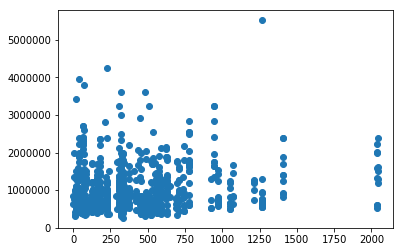

In [62]:
plt.scatter(df_vars['crime_C_average'], df_data['Price'])

(array([236., 157., 161.,  79.,  27.,  19.,  27.,   0.,   0.,  13.]),
 array([1.00000000e+00, 2.05133333e+02, 4.09266667e+02, 6.13400000e+02,
        8.17533333e+02, 1.02166667e+03, 1.22580000e+03, 1.42993333e+03,
        1.63406667e+03, 1.83820000e+03, 2.04233333e+03]),
 <a list of 10 Patch objects>)

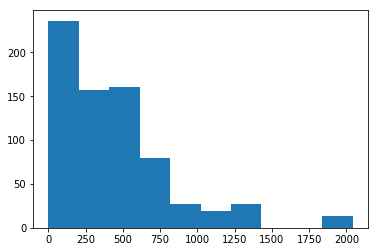

In [63]:
plt.hist(df_vars['crime_C_average'])

The data looks left skewed. One of the assumption of Linear Regression is that the features are normally distributed. To make this normal, we will have to apply log transformation to it.

In [64]:
df_vars['crime_C_average_logged'] = df_vars['crime_C_average'].apply(math.log)

C:\Users\Naveen Kaushik\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([  2.,   0.,   3.,  31.,  40.,  61.,  99., 174., 237.,  72.]),
 array([0.        , 0.76218482, 1.52436964, 2.28655447, 3.04873929,
        3.81092411, 4.57310893, 5.33529376, 6.09747858, 6.8596634 ,
        7.62184822]),
 <a list of 10 Patch objects>)

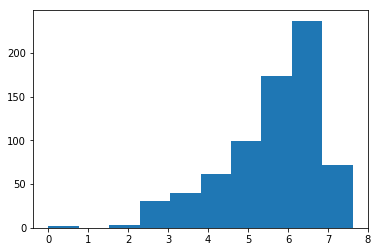

In [65]:
plt.hist(df_vars['crime_C_average_logged'])

One other added advantage of doing log transformation is that, it makes the transformed values interpretable. The log transformed values can be treated as the percent change happening in the actual variable.

#### Age

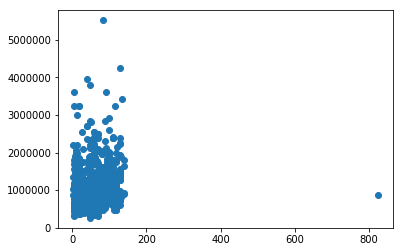

In [66]:
plt.scatter(df_vars['Age'], df_data['Price'])

We see that there is an outlier for the age factor. This would hamper the Linear regression line and try to pull the line towards it. To deal with this, we do a log transformatin because it would reduce the scale of the difference the outlier has from other data points.

In [67]:
df_vars['Age_logged'] = df_vars['Age'].apply(math.log)

C:\Users\Naveen Kaushik\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


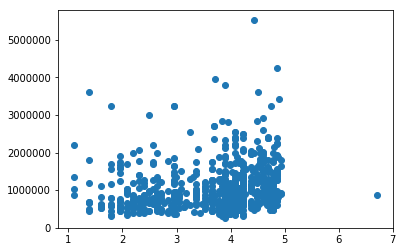

In [68]:
plt.scatter(df_vars['Age_logged'], df_data['Price'])

As we see in the above figure, now the outlier is is not very far off from the rest of the data points. 

#### Rooms

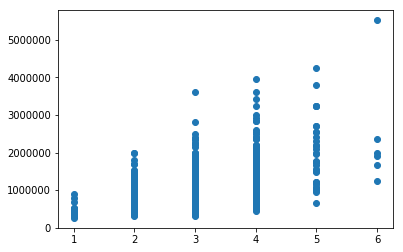

In [69]:
plt.scatter(df_vars['Rooms'], df_data['Price'])

The Rooms variable is a discrete ordinal variable. This does not need any transformation because its like a category and other vriables have been brought to a similar scale as Rooms and hence it is fair to compare it against other predictors. 

Hence we leave Rooms as it is. 

#### travel_min_to_CBD

(array([ 20.,  70., 151., 233., 164.,  47.,  19.,   8.,   5.,   2.]),
 array([ 0.        ,  7.65714286, 15.31428571, 22.97142857, 30.62857143,
        38.28571429, 45.94285714, 53.6       , 61.25714286, 68.91428571,
        76.57142857]),
 <a list of 10 Patch objects>)

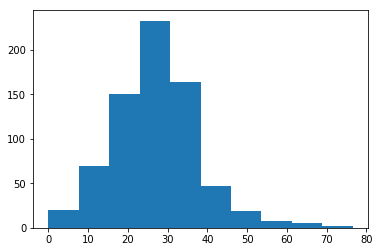

In [70]:
plt.hist(df_vars['travel_min_to_CBD'])

The distribution of it looks fairly Normal. So we can do some scaling to it. Since the other features after the transformation have come to a range of 1-10, I would bring these varibales to a similar scale so that it is fair for the model to judge on its coefficients. 

In [71]:
scaler = preprocessing.MinMaxScaler(feature_range=(1, 10))
df_vars['travel_min_to_CBD_trans'] = scaler.fit_transform(df_vars[['travel_min_to_CBD']])

C:\Users\Naveen Kaushik\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


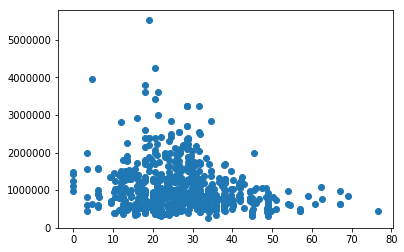

In [72]:
plt.scatter(df_vars['travel_min_to_CBD'], df_data['Price'])

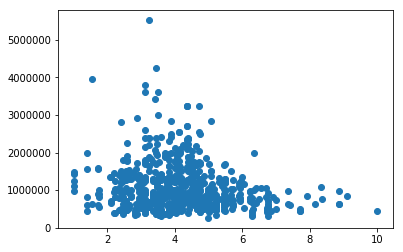

In [73]:
plt.scatter(df_vars['travel_min_to_CBD_trans'], df_data['Price'])

As we see in the two figures above, the relation of travel time and price is still the same, but we have brought down the scale of it in sync with other predictors. This kind of scaling is especially useful in Clustering techniques, where distance metrices are calculated, but they are useful to Linear Regression as well. 

(<matplotlib.axes._subplots.AxesSubplot at 0x1ae813cc9e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ae813cc9e8>)

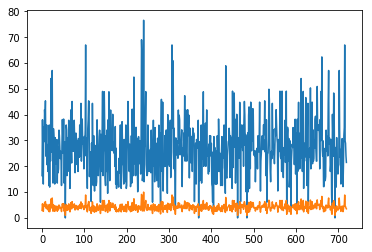

In [74]:
df_vars["travel_min_to_CBD"].plot(), df_vars["travel_min_to_CBD_trans"].plot()

As we see in the above figure, the orange line denotes the new scaled value and the blue line is the original values.

Having done all the transformation, lets try fitting a model on the transformed values. 

As we see below, the transformation has increased the R-squared and reduced the errors. 

In [75]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_vars[['Rooms', 'crime_C_average_logged', 'travel_min_to_CBD_trans', 'Age_logged']],df_data['Price'], test_size=0.25, random_state=42)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print("R-squared: ", reg.score(X_test, y_test))
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_squared_error(y_test, pred)))
print("Mean Absolute Percentage Error (MAPE): ", np.mean(np.abs((y_test - pred) / y_test)) * 100)

R-squared:  0.4224103286687488
Mean Squared Error (MSE):  192846968414.304
Root Mean Squared Error (RMSE):  439143.44856129185
Mean Absolute Percentage Error (MAPE):  33.81569601371477


#### Price

In addition tothis, we can also try transforming the target variable.

(array([272., 269., 106.,  41.,  18.,   6.,   4.,   2.,   0.,   1.]),
 array([ 257500.,  784250., 1311000., 1837750., 2364500., 2891250.,
        3418000., 3944750., 4471500., 4998250., 5525000.]),
 <a list of 10 Patch objects>)

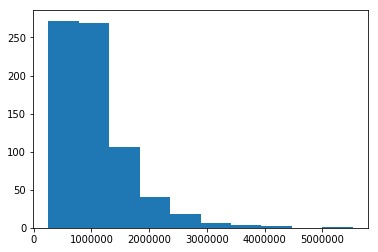

In [76]:
plt.hist(df_data['Price'])

Now, as we see in the above figure, Prices are not normally distributed. We can also transform the target variable to make it more normal distributed to help the Linear Regression model.

In [77]:
df_data['Price_logged'] = df_data['Price'].apply(math.log)

(array([ 10.,  59., 111., 167., 135., 124.,  74.,  27.,  10.,   2.]),
 array([12.458775  , 12.76537688, 13.07197876, 13.37858064, 13.68518252,
        13.9917844 , 14.29838628, 14.60498816, 14.91159004, 15.21819192,
        15.52479381]),
 <a list of 10 Patch objects>)

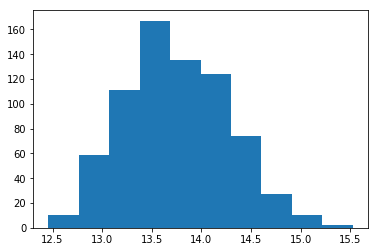

In [78]:
plt.hist(df_data['Price_logged'])

Now, if we see it looks more normal. It would be useful for the Linear Regression model to fit on the normally distributed values. 

In addition, its also useful for the target variables where we want to avoid them from touching 0, because log never lets a value hit 0. 

Lets try fitting a model on it. 

One thing to note here is, the predictions when made, need to be back transformed to the original scale.

This has been done below and when we compute MSE, RMSE, and MAPE we see a significant improvement in them. 

In [79]:
reg_new = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_vars[['Rooms', 'crime_C_average_logged', 'travel_min_to_CBD', 'Age_logged']],df_data['Price_logged'], test_size=0.25, random_state=42)
reg_new.fit(X_train, y_train)
pred_new = reg_new.predict(X_test)
pred_back = np.exp(pred_new)
y_test_back = np.exp(y_test)

print("Mean Squared Error (MSE): ", mean_squared_error(y_test_back, pred_back))
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_squared_error(y_test_back, pred_back)))
print("Mean Absolute Percentage Error (MAPE): ", np.mean(np.abs((y_test_back - pred_back) / y_test_back)) * 100)

Mean Squared Error (MSE):  195320512334.5441
Root Mean Squared Error (RMSE):  441950.803070369
Mean Absolute Percentage Error (MAPE):  31.01375436375037


## 5. Summary

The necessary output files have been generated with the relevant fields. 

* The transformations are done and it has been shown that these do help the Linear Regression model.
* It helped the model even more, when the target value was also normalised.


## 6. Observations

* The naming of columns is inconsistent in the data file and the specification file.

## 7. References
- Monash Moodle for FIT5196 https://lms.monash.edu/course/view.php?id=50799
- Select Pandas rows based on list index https://stackoverflow.com/questions/19155718/select-pandas-rows-based-on-list-index
- https://stats.stackexchange.com/questions/35591/normalization-vs-scaling
- https://stats.stackexchange.com/questions/35591/normalization-vs-scaling
- https://datascience.stackexchange.com/questions/22957/am-i-doing-a-log-transformation-of-data-correctly
- http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
- https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude